# TestCase3 - Convergence FEM / PINNs+Corr

In [1]:
from create_jsonfile import ask_user,read_config

# ask_user()
config = read_config()

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 4
# version : 1
# param_num : 1


In [15]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]
if testcase == 3:
    largenet = False
    if "largenet" in version:
        largenet = True
    version = "medium"
param_num = config["param_num"]        

In [16]:
high_degree = 10

## Imports + Load

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import os
import dolfin as df
import seaborn as sns
import dataframe_image as dfi

# from modfenics.fenics_expressions.fenics_expressions_2D import UexExpr
from scimba.equations.domain import SpaceTensor
from scimba.equations import domain

from testcases.utils import create_tree
# from modfenics.fenics_expressions.fenics_expressions import FExpr,AnisotropyExpr
# from modfenics.utils import get_param,compute_slope
from modfenics.error_estimations.fem import compute_error_estimations_fem_deg,compute_error_estimations_fem_all
from modfenics.error_estimations.add import compute_error_estimations_Corr_deg,compute_error_estimations_Corr_all,plot_Corr_vs_FEM
from modfenics.error_estimations.mult import compute_error_estimations_Mult_deg,compute_error_estimations_Mult_all,plot_Mult_vs_FEM

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
assert dimension == 2
if dimension == 2:
    if testcase == 1:
        if version == 1:
            from testcases.networks.test_2D.test_1.test_1_v1 import Run_laplacian2D,Poisson_2D
        elif version == 2:
            from testcases.networks.test_2D.test_1.test_1_v2 import Run_laplacian2D,Poisson_2D
        else:
            raise ValueError("Version not found")
        from testcases.problem.problem_2D import TestCase1
        problem = TestCase1(version=version)
        result_dir = "../../../results/fenics/test_2D/testcase"+str(testcase)+"/version"+str(version)
    elif testcase == 2:
        from testcases.networks.test_2D.test_2.test_2_v1 import Run_laplacian2D,Poisson_2D
        from testcases.problem.problem_2D import TestCase2
        problem = TestCase2(version=version)
        result_dir = "../../../results/fenics/test_2D/testcase"+str(testcase)+"/version"+str(version)
    elif testcase == 3:
        if version != "new":
            from testcases.networks.test_2D.test_3.test_3_v1 import Run_laplacian2D,Poisson_2D
        else:
            from testcases.networks.test_2D.test_3.test_3_v2 import Run_laplacian2D,Poisson_2D
        from testcases.problem.problem_2D import TestCase3
        from modfenics.solver_fem.EllipticDirSquareFEMSolver import EllipticDirSquareFEMSolver
        problem = TestCase3(version=version)
        result_dir = "../../../results/fenics/test_2D/testcase"+str(testcase)+"/"+version
        if version == "medium" and largenet:
            result_dir += "_largenet"

result_dir += "/cvg/"
create_tree(result_dir)
    # elif testcase == 4:

0.0   1.5
0.0   10.0
>> load network /home/u2/lecourtier/Article1/networks/test_2D/test_fe2.pth
network loaded
Error  tensor([0.0158])


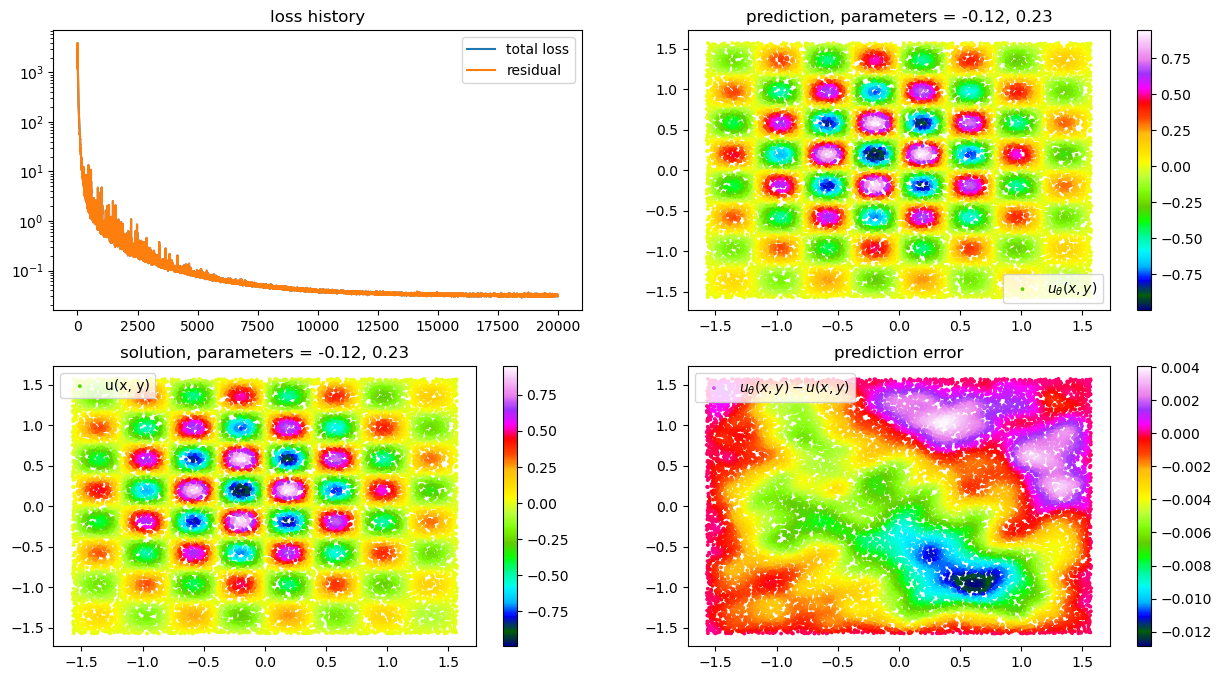

In [20]:
if dimension == 2:
    if testcase == 3 and version != "new":
        pde = Poisson_2D(version)
        trainer,u_theta = Run_laplacian2D(pde,version,largenet)
    else:
        pde = Poisson_2D()
        trainer,u_theta = Run_laplacian2D(pde)

## Convergence FEM

In [21]:
# degree = 2
# df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_estimations_fem_deg(param_num,problem,degree,high_degree,new_run=False,result_dir=result_dir)

## Read csv file ../../../results/fenics/test_2D/testcase2/version1/cvg/FEM_case2_v1_param2_degree1.csv
## Read csv file ../../../results/fenics/test_2D/testcase2/version1/cvg/FEM_case2_v1_param2_degree2.csv
## Read csv file ../../../results/fenics/test_2D/testcase2/version1/cvg/FEM_case2_v1_param2_degree3.csv


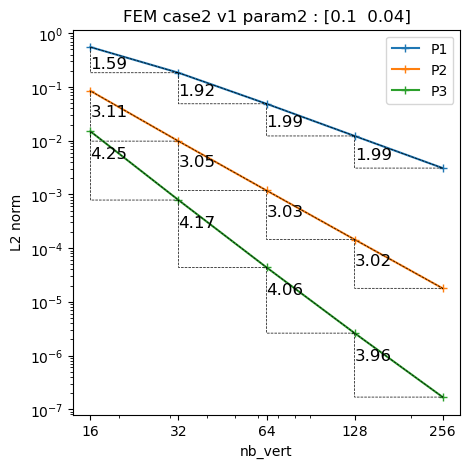

In [22]:
compute_error_estimations_fem_all(param_num,problem,high_degree,new_run=False,result_dir=result_dir,plot_cvg=True)

## Convergence PINNs+Corr

In [23]:
# degree = 2
# df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_estimations_Corr_deg(param_num,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Read csv file ../../../results/fenics/test_2D/testcase2/version1/cvg/Corr_case2_v1_param2_degree1.csv
## Read csv file ../../../results/fenics/test_2D/testcase2/version1/cvg/Corr_case2_v1_param2_degree2.csv
## Read csv file ../../../results/fenics/test_2D/testcase2/version1/cvg/Corr_case2_v1_param2_degree3.csv


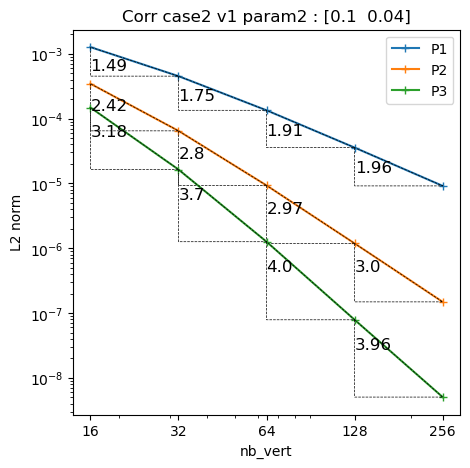

In [24]:
compute_error_estimations_Corr_all(param_num,problem,high_degree,u_theta,new_run=False,result_dir=result_dir,plot_cvg=True)

### Plots FEM-Corr

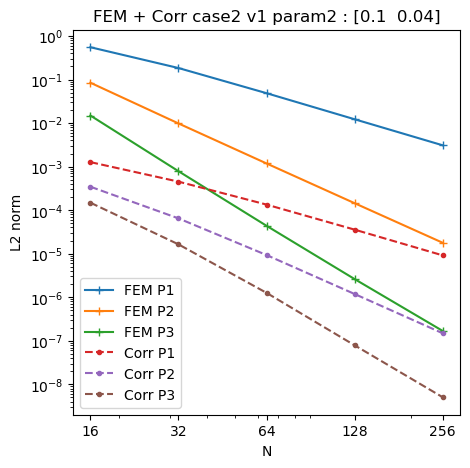

In [25]:
plot_Corr_vs_FEM(param_num,problem,result_dir=result_dir)

## Convergence PINNs+Mult

In [13]:
# M=0.0
# degree = 2
# df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_estimations_Mult_deg(param_num,problem,degree,high_degree,u_theta,M=M,new_run=False,result_dir=result_dir)

In [14]:
tab_M = [0.0,0.1,1.0,100.0]

for M in tab_M:
    print("#### M = ",M)
    compute_error_estimations_Mult_all(param_num,problem,high_degree,u_theta,M=M,new_run=False,result_dir=result_dir,plot_cvg=True)

#### M =  0.0
../../../results/fenics/test_2D/testcase3/big/cvg/u_ref/u_ref_1.npy
## Run error estimation with Corr (mult) for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
V_ref created with  1000  vertices and degree  3
Load reference solution
Time to generate mesh:  0.000308990478515625
Mesh created with  16  vertices : h = 0.09428090415820647
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Time to assemble the matrix :  26.62583327293396
Time to solve the system : 0.009128093719482422
Time to compute the error : 7.200536251068115
nb_vert=16, norme_L2=0.026315378610861827
Time to generate mesh:  0.00023412704467773438
Mesh created with  32  vertices : h = 0.045619792334616084
Time to assemble the matrix :  2.940722703933716
Time to solve the system : 0.020581960678100586
Time to compute the error : 7.298876762390137
nb_vert=32, norme_L2=0.008136088930874643
T

KeyboardInterrupt: 

<Figure size 500x500 with 0 Axes>